In [1]:
%jars ..\\target\\msrcpsp-0.2-SNAPSHOT.jar

import it.zerko.msrcpsp.problem.Schedule;
import it.zerko.msrcpsp.solver.Solver;
import it.zerko.msrcpsp.solver.operator.Operator;
import it.zerko.msrcpsp.solver.operator.OrderCrossover;
import it.zerko.msrcpsp.solver.operator.OrderMutation;
import it.zerko.msrcpsp.solver.operator.ResourceCrossover;
import it.zerko.msrcpsp.solver.operator.ResourceMutation;
import it.zerko.msrcpsp.solver.operator.TournamentSelection;

import java.nio.file.Files;
import java.nio.file.Paths;
import java.time.Duration;
import java.util.List;

In [2]:
List<String> scheduleInText = Files.readAllLines(Paths.get("..\\datasets\\100_5_20_9_D3.def"));
String.join("\n", scheduleInText);

File name: 100_5_20_9_D3.def
Creation date: Tue Nov 25 16:29:03 CET 2014
Website: http://imopse.ii.pwr.edu.pl/ 
Reference: 
Myszkowski P. B., Skowronski M. E., Olech L., Oslizlo K., 
Hybrid Ant Colony Optimization in solving Multi-Skill Resource-Constrained Project Scheduling Problem, 
Soft Computing, DOI: DOI 10.1007/s00500-014-1455-x 
=====================================================IMPORTANT======================================================
Lacking task identifiers is a result of transforming definitions from MPP to DEF format.
Those lacking ids reflects to the summary tasks, available in MS Project definition that have been removed here.
 Therefore number of precedence relations increased, as relations between summary task had to be multiplied
to all tasks that were included into summary ones. Both file definition formats are compatible with each other.
The file is free from calendar restrictions, typical for .mpp format
General characteristics:
Tasks: 78
Resources: 5
Prece

In [3]:
int populationSize = 100;
int passLimit = 1000;
List<Operator> operators = List.of(
        new TournamentSelection(10),
        new OrderCrossover(0.9),
        new ResourceCrossover(0.9),
        new OrderMutation(0.01),
        new ResourceMutation(0.01));
Schedule defaultSchedule = new Schedule(scheduleInText);
Solver solver = new Solver(defaultSchedule, populationSize, operators, passLimit, Duration.ofMinutes(1));
solver.run();
solver.getBestSchedule().get().getFitness()

387

In [4]:
String.join("\n", solver.getBestSchedule().get().toSolution())

0 2-53 1-81 4-10 5-17 3-23
20 2-88
23 5-63
35 3-24
39 4-13
40 1-65
44 2-20
48 4-89
60 5-8
69 3-38
72 5-29
79 1-70 3-21
81 5-44
82 4-98
83 2-71
93 2-99 3-42
107 2-76
108 3-40
116 1-52
119 5-46
122 4-91
124 2-1
126 3-68
129 1-57
131 5-93
143 2-50
149 5-94
162 4-96
165 3-2
166 1-22 2-14
177 5-16
180 1-87
186 5-78
187 2-41
197 4-62
201 3-9
203 2-19
212 3-31
215 5-56 1-26
227 4-4
232 5-43 3-75
234 2-54
244 5-6
247 4-69 2-61
252 3-95
253 1-47
257 2-80
262 1-85
264 4-37
277 1-97
280 5-55
290 3-77
291 2-86
299 1-35
300 4-33
312 5-90
322 4-60
328 3-34
329 2-67
330 5-58
332 1-82
339 2-66
348 4-7 3-15
350 5-92
360 5-51
367 1-32
373 2-73

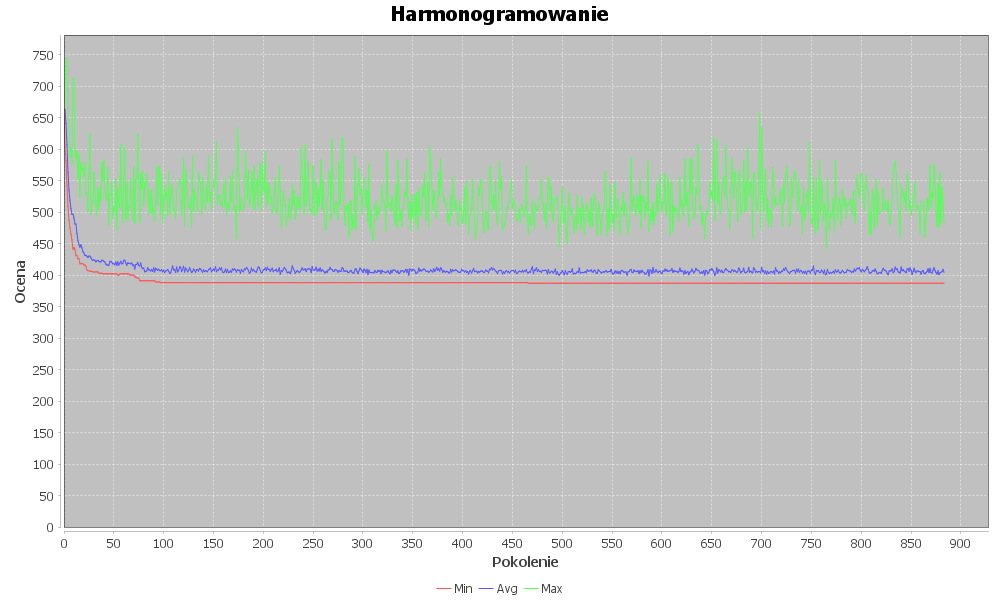

In [5]:
solver.toGraph().createBufferedImage(1000, 600)